# **Top Ten Player Study**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\project-five-golf-data-analytics\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\project-five-golf-data-analytics'

In [6]:
import pandas as pd
import numpy as np

First, gain an overview of the data (bearing in mind missing fields and some data errors have been studied in the Data Collection phase).

In [8]:
file_path = "inputs/datasets/raw/ASA All PGA Raw Data - Tourn Level.csv"
df = pd.read_csv(file_path)

print("Data loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns\n")

display(df.head())

df.info()

Data loaded successfully!
Shape: 36,864 rows × 37 columns



,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [12]:
num_features = df.select_dtypes(include=np.number).columns.tolist()
cat_features = df.select_dtypes(exclude=np.number).columns.tolist()

print("\nNumerical features:", len(num_features))
print(num_features)
print("\nCategorical features:", len(cat_features))
print(cat_features)


Numerical features: 31
['tournament id', 'player id', 'hole_par', 'strokes', 'hole_DKP', 'hole_FDP', 'hole_SDP', 'streak_DKP', 'streak_FDP', 'streak_SDP', 'n_rounds', 'made_cut', 'pos', 'finish_DKP', 'finish_FDP', 'finish_SDP', 'total_DKP', 'total_FDP', 'total_SDP', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'purse', 'season', 'no_cut', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']

Categorical features: 6
['Player_initial_last', 'player', 'tournament name', 'course', 'date', 'Finish']


Check for duplicates.

In [14]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


Before further data exploration, it is necessary to create a data frame of data that combines the pos and finish features (see data collection notebook) to check that this data will be suitable for the client's business requirements.
To do this, first we need to make 'Finish' entirely numeric data.

In [23]:
df_temp = df.copy()

df_temp['finish_clean'] = df_temp['Finish'].astype(str).str.replace('T', '', regex=False)

df_temp['finish_numeric'] = pd.to_numeric(df_temp['finish_clean'], errors='coerce')

df_temp['finish_numeric'] = df_temp['finish_numeric'].fillna(0)

print(df_temp[['pos', 'Finish', 'finish_clean', 'finish_numeric']].head(10))



    pos Finish finish_clean  finish_numeric
0  32.0    T32           32            32.0
1  18.0    T18           18            18.0
2   NaN    CUT           CU             0.0
3   NaN    CUT           CU             0.0
4   NaN    CUT           CU             0.0
5   NaN    CUT           CU             0.0
6  26.0    T26           26            26.0
7  26.0    T26           26            26.0
8  67.0    T67           67            67.0
9   NaN    CUT           CU             0.0


Next, check for discrepencies between finish_numeric and pos.

In [24]:
df_temp['pos_differs'] = df_temp['finish_numeric'] != df_temp['pos']
num_differences = df_temp['pos_differs'].sum()
print(f"Number of rows where finish_numeric and pos differ: {num_differences}")
print(df_temp[df_temp['pos_differs']][['pos', 'Finish', 'finish_numeric']].head(10))

Number of rows where finish_numeric and pos differ: 20688
    pos Finish  finish_numeric
2   NaN    CUT             0.0
3   NaN    CUT             0.0
4   NaN    CUT             0.0
5   NaN    CUT             0.0
9   NaN    CUT             0.0
12  NaN    NaN             0.0
13  NaN    CUT             0.0
15  NaN    CUT             0.0
21  NaN    CUT             0.0
24  NaN    CUT             0.0


Turn everything that is non numeric in 'pos' to a 0 (to indicate a bad finish in the tournament).

In [25]:
df_temp['pos'] = df_temp['pos'].fillna(0)
print(df_temp['pos'].sample(20, random_state=42).to_list())

[0.0, 0.0, 8.0, 0.0, 63.0, 32.0, 3.0, 12.0, 15.0, 32.0, 11.0, 29.0, 0.0, 0.0, 0.0, 69.0, 29.0, 54.0, 0.0, 36.0]


Now check of any discrepencies between finish_numeric and pos again.

In [26]:
df_temp['pos_differs'] = df_temp['finish_numeric'] != df_temp['pos']
num_differences = df_temp['pos_differs'].sum()
print(f"Number of rows where finish_numeric and pos differ: {num_differences}")
print(df_temp[df_temp['pos_differs']][['pos', 'Finish', 'finish_numeric']].head(10))

Number of rows where finish_numeric and pos differ: 5505
      pos Finish  finish_numeric
94   18.0    NaN             0.0
324  77.0    NaN             0.0
325   8.0    NaN             0.0
394  81.0    NaN             0.0
534  41.0    NaN             0.0
601   5.0    NaN             0.0
677  33.0    NaN             0.0
798  10.0    NaN             0.0
800  21.0    NaN             0.0
927  14.0    NaN             0.0


From manual checks during the Data Collection phase, we believe pos to be the more reliable field. However, in some cases finish_numeric will have a result in the top ten that is accurate and pos will be inaccurate.

In [27]:
top_ten_mismatches = df_temp[
    (df_temp['finish_numeric'].between(1, 10, inclusive='both')) &
    (df_temp['finish_numeric'] != df_temp['pos'])
]
print(top_ten_mismatches[['pos', 'Finish', 'finish_numeric']])
print(f"\nNumber of mismatches: {len(top_ten_mismatches)}")


        pos Finish  finish_numeric
2771    0.0     T8             8.0
3629    0.0      3             3.0
4211    0.0     T6             6.0
4434    0.0     T5             5.0
8676    0.0      4             4.0
8677    0.0     T2             2.0
8685    0.0     T8             8.0
8729    0.0     T5             5.0
8737    0.0     T8             8.0
8761    0.0      1             1.0
8763    0.0     T8             8.0
8765    0.0     T2             2.0
8769    0.0     T8             8.0
8772    0.0     T5             5.0
8792    0.0     T8             8.0
8811    0.0     T5             5.0
8836    0.0     T6             6.0
8838    0.0     T6             6.0
8852    0.0     T6             6.0
8862    0.0     T4             4.0
8871    0.0      3             3.0
8877    0.0     T4             4.0
8887    0.0     T6             6.0
8907    0.0      2             2.0
8923    0.0      1             1.0
8934    0.0     T6             6.0
8940    0.0     T6             6.0
18524   0.0     T7  

We now need to create a new feature that uses the pos value apart from these 41 cases called true_pos.

In [28]:
df_temp['true_pos'] = np.where(
    (df_temp['finish_numeric'].between(1, 10, inclusive='both')) &
    (df_temp['finish_numeric'] != df_temp['pos']),
    df_temp['finish_numeric'],
    df_temp['pos']
)

Print one occurence where there was an issue to check for accuracy.

In [29]:
print(df_temp.loc[2771, ['pos', 'true_pos']])

pos         0.0
true_pos    8.0
Name: 2771, dtype: object


Finally, use the true_pos value to create a new feature called top_ten, whereby 0 = not in the top ten and 1 = in the top ten.

In [30]:
df_temp['top_ten'] = np.where(df_temp['true_pos'].between(1, 10, inclusive='both'), 1, 0)
print(df_temp['top_ten'].value_counts())

top_ten
0    33116
1     3748
Name: count, dtype: int64


## Analyse averag strokes gained data for top_ten vs not top_ten finishers.

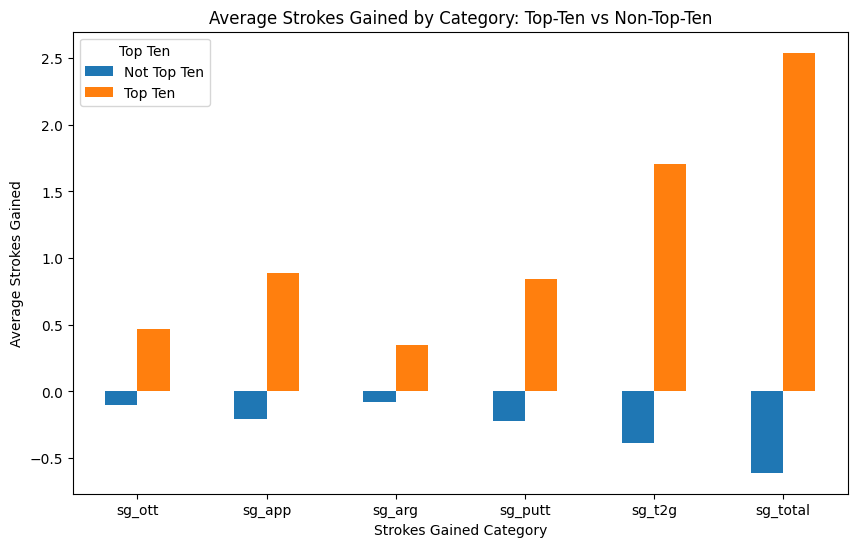

In [32]:
import matplotlib.pyplot as plt

sg_features = ['sg_ott', 'sg_app', 'sg_arg', 'sg_putt', 'sg_t2g', 'sg_total']

avg_sg = df_temp.groupby('top_ten')[sg_features].mean()

avg_sg.T.plot(kind='bar', figsize=(10,6))
plt.title('Average Strokes Gained by Category: Top-Ten vs Non-Top-Ten')
plt.xlabel('Strokes Gained Category')
plt.ylabel('Average Strokes Gained')
plt.xticks(rotation=0)
plt.legend(title='Top Ten', labels=['Not Top Ten', 'Top Ten'])
plt.show()

